# DATA ANALYSIS AND PARSING
# VISUALIZATION ACCORDING TO MONTHS

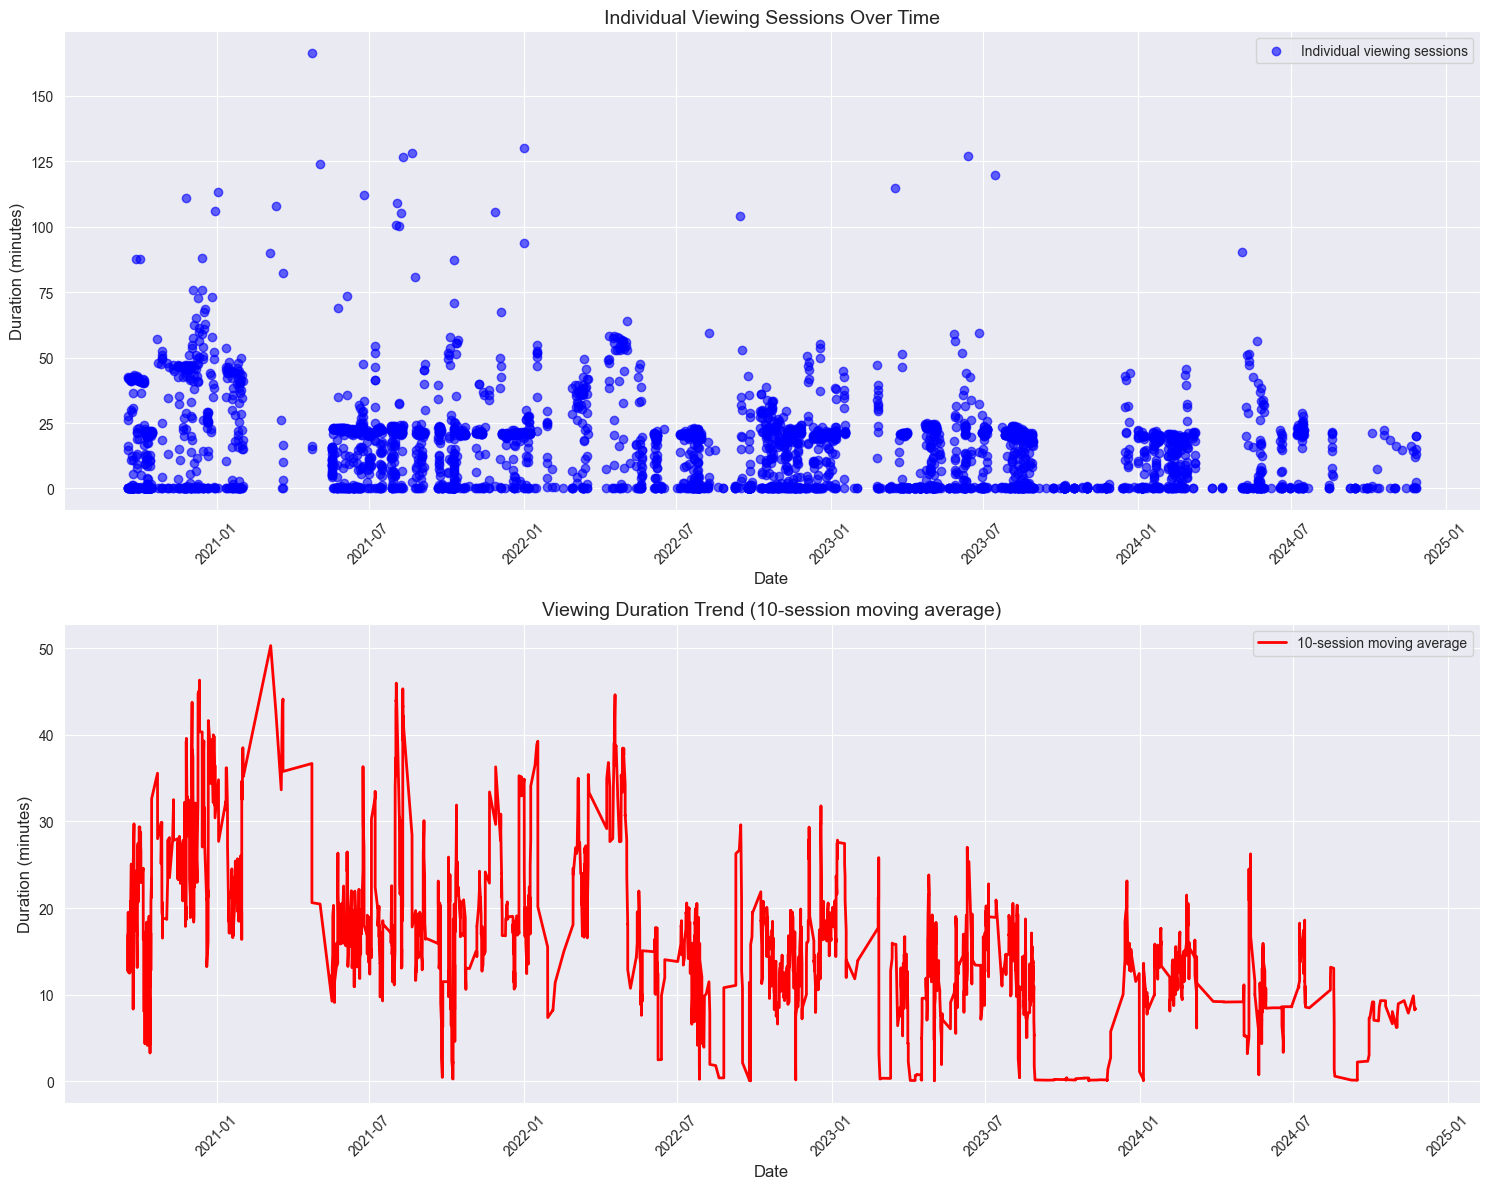


Viewing Statistics:
Total number of views: 4072
Average viewing duration: 15.48 minutes
Longest viewing session: 166.33 minutes
Shortest viewing session: 0.02 minutes


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

# Read the CSV data with the correct column names
data = pd.read_csv('myData.csv', names=[
    'Profile Name', 'Start Time', 'Duration', 'Attributes', 'Title', 
    'Supplemental Video Type', 'Device Type', 'Bookmark', 'Latest Bookmark', 'Country'
])

# Convert Duration to timedelta
def convert_duration(duration_str):
    try:
        if pd.isna(duration_str):
            return pd.NaT
        parts = duration_str.split(':')
        hours = int(parts[0])
        minutes = int(parts[1])
        seconds = int(parts[2])
        return pd.Timedelta(hours=hours, minutes=minutes, seconds=seconds)
    except:
        return pd.NaT

# Process the data - first convert Start Time, then Duration
data = data.iloc[1:]  # Skip the header row
data['Start Time'] = pd.to_datetime(data['Start Time'])
data['Duration'] = data['Duration'].apply(convert_duration)

# Filter for Mehmet Fatih's entries and remove NaN values
mehmet_data = data[data['Profile Name'] == 'Mehmet Fatih'].copy()
mehmet_data = mehmet_data.dropna(subset=['Duration', 'Start Time'])

# Convert duration to minutes for easier plotting
mehmet_data['Duration_Minutes'] = mehmet_data['Duration'].dt.total_seconds() / 60

# Create two subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(15, 12))
sns.set_style("darkgrid")

# Plot 1: Scatter plot of viewing sessions
ax1.scatter(mehmet_data['Start Time'], mehmet_data['Duration_Minutes'], 
           alpha=0.6, color='blue', label='Individual viewing sessions')
ax1.set_title("Individual Viewing Sessions Over Time", fontsize=14)
ax1.set_xlabel('Date', fontsize=12)
ax1.set_ylabel('Duration (minutes)', fontsize=12)
ax1.tick_params(axis='x', rotation=45)
ax1.legend()

# Plot 2: Moving average trend
ax2.plot(mehmet_data['Start Time'], mehmet_data['Duration_Minutes'].rolling(10).mean(), 
         color='red', linewidth=2, label='10-session moving average')
ax2.set_title("Viewing Duration Trend (10-session moving average)", fontsize=14)
ax2.set_xlabel('Date', fontsize=12)
ax2.set_ylabel('Duration (minutes)', fontsize=12)
ax2.tick_params(axis='x', rotation=45)
ax2.legend()

# Adjust layout to prevent label cutoff
plt.tight_layout()

# Show the plots
plt.show()

# Print some statistics
print("\nViewing Statistics:")
print(f"Total number of views: {len(mehmet_data)}")
print(f"Average viewing duration: {mehmet_data['Duration_Minutes'].mean():.2f} minutes")
print(f"Longest viewing session: {mehmet_data['Duration_Minutes'].max():.2f} minutes")
print(f"Shortest viewing session: {mehmet_data['Duration_Minutes'].min():.2f} minutes")

#  VISUALIZATION ACCORDING TO YEARS

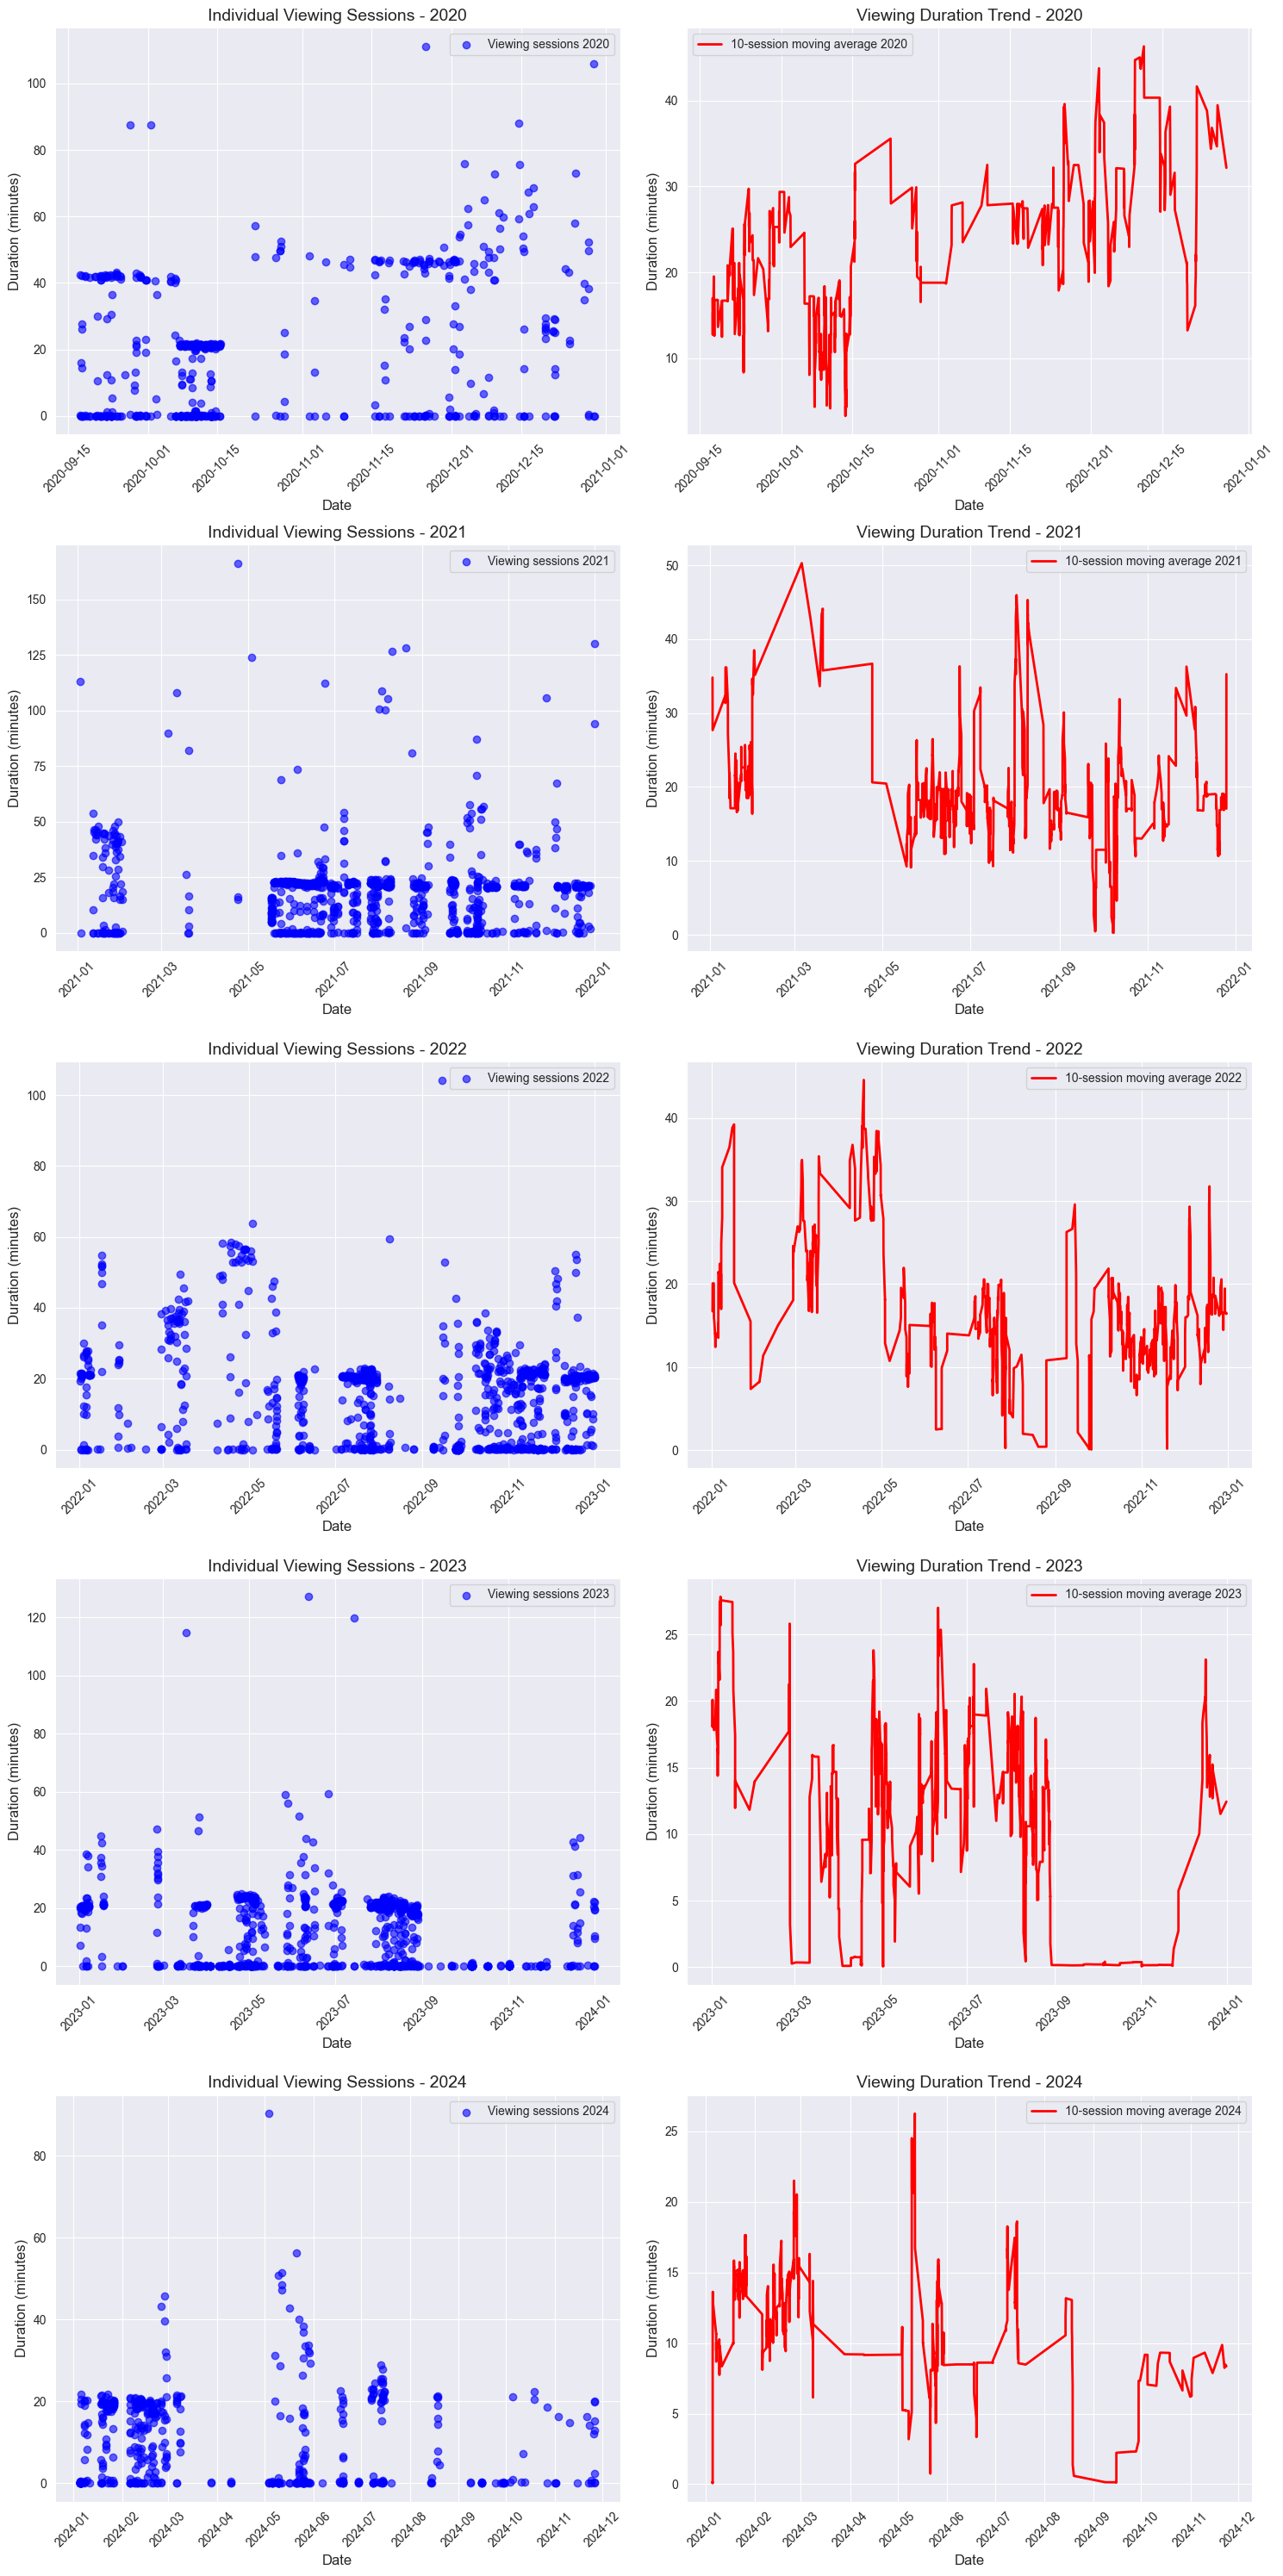


Viewing Statistics by Year:

Year 2020:
Total number of views: 550
Average viewing duration: 19.97 minutes
Longest viewing session: 111.15 minutes
Shortest viewing session: 0.02 minutes

Year 2021:
Total number of views: 1067
Average viewing duration: 18.56 minutes
Longest viewing session: 166.33 minutes
Shortest viewing session: 0.02 minutes

Year 2022:
Total number of views: 1045
Average viewing duration: 15.35 minutes
Longest viewing session: 104.25 minutes
Shortest viewing session: 0.02 minutes

Year 2023:
Total number of views: 912
Average viewing duration: 11.87 minutes
Longest viewing session: 127.08 minutes
Shortest viewing session: 0.02 minutes

Year 2024:
Total number of views: 498
Average viewing duration: 10.83 minutes
Longest viewing session: 90.27 minutes
Shortest viewing session: 0.02 minutes


In [3]:

# After processing mehmet_data, add year-by-year analysis
mehmet_data['Year'] = mehmet_data['Start Time'].dt.year

# Create figure with 3 rows of subplots
fig, axes = plt.subplots(len(mehmet_data['Year'].unique()), 2, figsize=(15, 6*len(mehmet_data['Year'].unique())))
sns.set_style("darkgrid")

# Plot data for each year
for idx, year in enumerate(sorted(mehmet_data['Year'].unique())):
    year_data = mehmet_data[mehmet_data['Year'] == year]
    
    # Scatter plot for the year
    axes[idx, 0].scatter(year_data['Start Time'], year_data['Duration_Minutes'], 
                        alpha=0.6, color='blue', label=f'Viewing sessions {year}')
    axes[idx, 0].set_title(f"Individual Viewing Sessions - {year}", fontsize=14)
    axes[idx, 0].set_xlabel('Date', fontsize=12)
    axes[idx, 0].set_ylabel('Duration (minutes)', fontsize=12)
    axes[idx, 0].tick_params(axis='x', rotation=45)
    axes[idx, 0].legend()

    # Moving average trend for the year
    axes[idx, 1].plot(year_data['Start Time'], 
                     year_data['Duration_Minutes'].rolling(10).mean(), 
                     color='red', linewidth=2, 
                     label=f'10-session moving average {year}')
    axes[idx, 1].set_title(f"Viewing Duration Trend - {year}", fontsize=14)
    axes[idx, 1].set_xlabel('Date', fontsize=12)
    axes[idx, 1].set_ylabel('Duration (minutes)', fontsize=12)
    axes[idx, 1].tick_params(axis='x', rotation=45)
    axes[idx, 1].legend()

# Adjust layout to prevent label cutoff
plt.tight_layout()

# Show the plots
plt.show()

# Print statistics by year
print("\nViewing Statistics by Year:")
for year in sorted(mehmet_data['Year'].unique()):
    year_data = mehmet_data[mehmet_data['Year'] == year]
    print(f"\nYear {year}:")
    print(f"Total number of views: {len(year_data)}")
    print(f"Average viewing duration: {year_data['Duration_Minutes'].mean():.2f} minutes")
    print(f"Longest viewing session: {year_data['Duration_Minutes'].max():.2f} minutes")
    print(f"Shortest viewing session: {year_data['Duration_Minutes'].min():.2f} minutes")